# Python Project - (Prosper Loan Dataset Exploration )

## Nwabuokei Jude Emeka

## Introduction
> The Prosper loan dataset contains the financial information of customers who has an ongoing, completed, or cancelled/written-off loan  with the Prosper online lending bank. The dataset includes information such as loan amount, interest rate, borrower income, loan status, credit score, and other loan attributes. 





## Preliminary Wrangling

### Import the Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")


from powerbiclient import Report, models
from powerbiclient.authentication import DeviceCodeLoginAuthentication
from IPython.display import IFrame

### Import Dataset


In [2]:
df=pd.read_csv('Prosper Loan.csv')

In [3]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.shape

(113937, 81)

### Exploring the Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6    ClosedDate                          55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', ' ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Avail

### Obtaining Important Features from the Dataset

> The ProsperLoan dataset contains so many columns. For further analysis, it will be best to select the most relevant features. 

In [7]:
features = ['CreditGrade','LoanStatus', 'ProsperRating (Alpha)', 'Term', 'EmploymentStatus','EmploymentStatusDuration',
           'IncomeRange', 'IncomeVerifiable', 'MonthlyLoanPayment', 'LoanOriginationQuarter', 'BorrowerRate', 'TotalInquiries',
           'LoanOriginalAmount','StatedMonthlyIncome', 'AmountDelinquent', 'BorrowerState']
features_df = df[features]

In [8]:
features_df.head()

,CreditGrade,LoanStatus,ProsperRating (Alpha),Term,EmploymentStatus,EmploymentStatusDuration,IncomeRange,IncomeVerifiable,MonthlyLoanPayment,LoanOriginationQuarter,BorrowerRate,TotalInquiries,LoanOriginalAmount,StatedMonthlyIncome,AmountDelinquent,BorrowerState
0,C,Completed,NaN,36,Self-employed,2.0,"$25,000-49,999",True,330.43,Q3 2007,0.1580,3.0,9425,3083.333333,472.0,CO
1,NaN,Current,A,36,Employed,44.0,"$50,000-74,999",True,318.93,Q1 2014,0.0920,5.0,10000,6125.000000,0.0,CO
2,HR,Completed,NaN,36,Not available,NaN,Not displayed,True,123.32,Q1 2007,0.2750,1.0,3001,2083.333333,NaN,GA
3,NaN,Current,A,36,Employed,113.0,"$25,000-49,999",True,321.45,Q4 2012,0.0974,1.0,10000,2875.000000,10056.0,GA
4,NaN,Current,D,36,Employed,44.0,"$100,000+",True,563.97,Q3 2013,0.2085,9.0,15000,9583.333333,0.0,MN


### Misssing Values in the Dataset

In [9]:
features_df.isnull().sum()

CreditGrade                 84984
LoanStatus                      0
ProsperRating (Alpha)       29084
Term                            0
EmploymentStatus             2255
EmploymentStatusDuration     7625
IncomeRange                     0
IncomeVerifiable                0
MonthlyLoanPayment              0
LoanOriginationQuarter          0
BorrowerRate                    0
TotalInquiries               1159
LoanOriginalAmount              0
StatedMonthlyIncome             0
AmountDelinquent             7622
BorrowerState                5515
dtype: int64

#### CreditGrade, ProsperRating (Alpha), EmploymentStatus, EmploymentStatusDuration, TotalInquiries, BorrowerState   columns contain null values.

#### Now, we calculate the percentage of the missing values in the dataset to the total dataset

In [10]:
100* features_df.isnull().sum() / len(features_df)

CreditGrade                 74.588588
LoanStatus                   0.000000
ProsperRating (Alpha)       25.526387
Term                         0.000000
EmploymentStatus             1.979164
EmploymentStatusDuration     6.692295
IncomeRange                  0.000000
IncomeVerifiable             0.000000
MonthlyLoanPayment           0.000000
LoanOriginationQuarter       0.000000
BorrowerRate                 0.000000
TotalInquiries               1.017229
LoanOriginalAmount           0.000000
StatedMonthlyIncome          0.000000
AmountDelinquent             6.689662
BorrowerState                4.840394
dtype: float64

#### CreditGrade and  ProsperRating (Alpha) has 74.6% and 25.5% of missing values respectively, when compared to the entire dataset. This is a lot of missing values and therefore, we will have to fill in these missing values before using these columns for any analysis. The rest features are less than 10% and so is good enough for analysis and visualisation.

### Statiscal Description of the Dataset

In [11]:
features_df.describe()

,Term,EmploymentStatusDuration,MonthlyLoanPayment,BorrowerRate,TotalInquiries,LoanOriginalAmount,StatedMonthlyIncome,AmountDelinquent
count,113937.000000,106312.000000,113937.000000,113937.000000,112778.000000,113937.00000,1.139370e+05,106315.000000
mean,40.830248,96.071582,272.475783,0.192764,5.584405,8337.01385,5.608026e+03,984.507059
std,10.436212,94.480605,192.697812,0.074818,6.429946,6245.80058,7.478497e+03,7158.270157
min,12.000000,0.000000,0.000000,0.000000,0.000000,1000.00000,0.000000e+00,0.000000
25%,36.000000,26.000000,131.620000,0.134000,2.000000,4000.00000,3.200333e+03,0.000000
50%,36.000000,67.000000,217.740000,0.184000,4.000000,6500.00000,4.666667e+03,0.000000
75%,36.000000,137.000000,371.580000,0.250000,7.000000,12000.00000,6.825000e+03,0.000000
max,60.000000,755.000000,2251.510000,0.497500,379.000000,35000.00000,1.750003e+06,463881.000000


In [12]:
features_df.corr()

,Term,EmploymentStatusDuration,IncomeVerifiable,MonthlyLoanPayment,BorrowerRate,TotalInquiries,LoanOriginalAmount,StatedMonthlyIncome,AmountDelinquent
Term,1.000000,0.082476,0.040402,0.091026,0.020085,-0.103132,0.338927,0.028479,-0.016459
EmploymentStatusDuration,0.082476,1.000000,0.030143,0.081160,-0.019907,-0.044736,0.098149,0.069830,0.008185
IncomeVerifiable,0.040402,0.030143,1.000000,0.030286,-0.099540,0.050538,0.056290,0.022477,0.008977
MonthlyLoanPayment,0.091026,0.081160,0.030286,1.000000,-0.244742,-0.044291,0.931984,0.196830,-0.029638
BorrowerRate,0.020085,-0.019907,-0.099540,-0.244742,1.000000,0.153129,-0.328960,-0.088982,0.065645
TotalInquiries,-0.103132,-0.044736,0.050538,-0.044291,0.153129,1.000000,-0.078333,0.036480,0.031495
LoanOriginalAmount,0.338927,0.098149,0.056290,0.931984,-0.328960,-0.078333,1.000000,0.201259,-0.038756
StatedMonthlyIncome,0.028479,0.069830,0.022477,0.196830,-0.088982,0.036480,0.201259,1.000000,0.008662
AmountDelinquent,-0.016459,0.008185,0.008977,-0.029638,0.065645,0.031495,-0.038756,0.008662,1.000000


 ####  Notice the almost perfect corellation between LoanOriginalAmount and MonthlyLoanPayment. We will have to investigate this further.

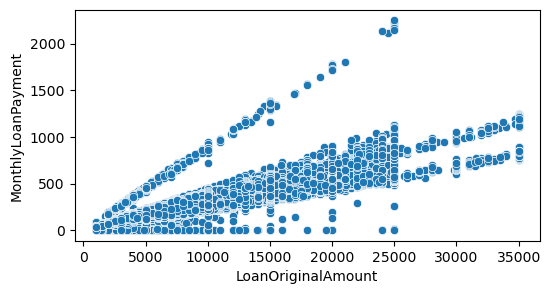

In [13]:
plt.figure(figsize=(6,3))

sns.scatterplot(x='LoanOriginalAmount',y='MonthlyLoanPayment',data=features_df,);

#### Using Scatterplot, we have shown the near perfect correlation between the 2 features. This shows that an increase in LoanOriginalAmount leads to an almost equal increase in MonthlyLoanPayment.

## Univariate Exploration 


### Borrowers Credit Grade

#### Filling the CreditGrade column using matching values from the ProsperRating(Alpha) column.  Both columns contain values that complement their missing values.

In [14]:
features_df['CreditGrade'] = features_df['CreditGrade'].fillna(features_df['ProsperRating (Alpha)'].map({'AA': 'AA', 'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'HR': 'HR'}))


In [15]:
features_df.CreditGrade.value_counts()

C     23994
B     19970
D     19427
A     17866
E     13084
HR    10443
AA     8881
NC      141
Name: CreditGrade, dtype: int64

#### Ploting a countplot for the CreditGrade Column.

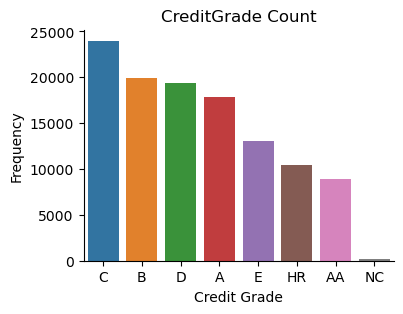

In [59]:
order = features_df.CreditGrade.value_counts()
desc_order = order.index.tolist()        # Arranges the CreditGrade categories in desc order

plt.figure(figsize=(4,3))
sns.countplot(data=features_df, x='CreditGrade', order=desc_order)  # countplot without the IsBorrowerHomeOwner Hue
# sns.countplot(data=df, x='CreditGrade', order=desc_order, hue='IsBorrowerHomeowner')  # countplot with the IsBorrowerHomeOwner Hue
sns.despine()

plt.title('CreditGrade Count')
plt.xlabel('Credit Grade')
plt.ylabel('Frequency');

#### 23,994 borrowers had a credit grade of C, making it the most common credit grade amongst the borrowers. It was closely followed by credit grade of B and D. Over 17,866 borrowers had a credit grade of A, and about 8881 with AA which was the second least popular amongst borrowers. The least popular credit grade was NC (no credit grade) with 141 borrowers having the credit score.

 ### Loan Term

In [17]:
features_df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

#### Ploting a countplot for Loan Term.

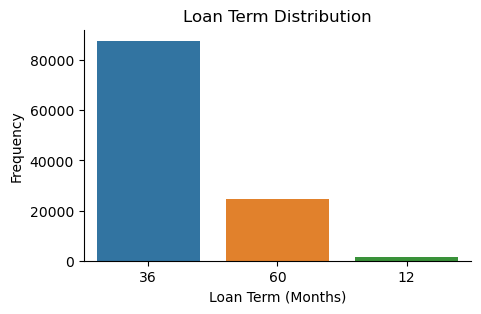

In [58]:
order = features_df.Term.value_counts()
desc_order = order.index.tolist()            # Arranges the Loan Term categories in desc order

plt.figure(figsize=(5,3))
sns.countplot(data=features_df, x='Term', order=desc_order)
sns.despine()

plt.title('Loan Term Distribution')
plt.xlabel('Loan Term (Months)')
plt.ylabel('Frequency');

#### The most common loan term was 36 months (3 years) with 87,778 borrowers prefering this payment term plan. 60 months (5 years) plan was next with 24,545 borrowers. The least popular was the 1 year plan with 1,614 customers choosing this plan.

### Borrowers Employment Status

In [19]:
features_df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

#### Countplot for Employment Status

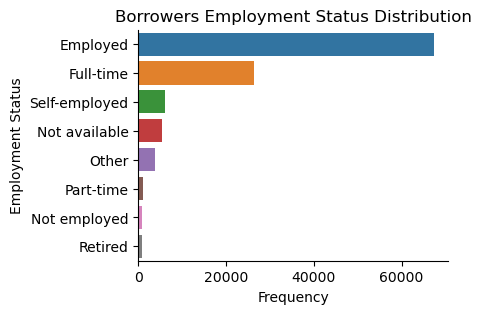

In [57]:
order = features_df.EmploymentStatus.value_counts()
desc_order = order.index.tolist()            # Arranges the EmploymentStatus categories in desc order

plt.figure(figsize=(4,3))
sns.countplot(data=features_df, y='EmploymentStatus', order=desc_order)
sns.despine()

plt.title('Borrowers Employment Status Distribution')
plt.ylabel('Employment Status')
plt.xlabel('Frequency');

####  67,322 loanees are employed, and 26,355 in full-time employment.  6,134 were self employed, and less than 2.5% of the entire borrowers are either in part-time employment, not employed or retired.

### Borrowers Employment Status Duration

#### Distplot for Employment Status Duration

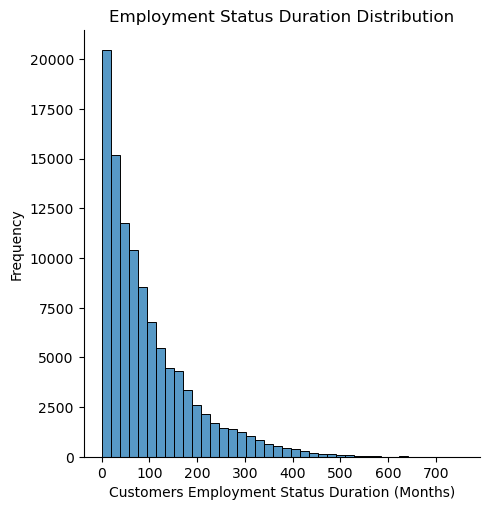

In [21]:
sns.displot(features_df['EmploymentStatusDuration'], kde=False, bins=40)

plt.title('Employment Status Duration Distribution')
plt.ylabel('Frequency')
plt.xlabel('Customers Employment Status Duration (Months)');

 #### Most of the  borrowers are in the range of 0-200 months employment duration. 

### Borrowers Loan Status

In [22]:
features_df.LoanStatus.unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

####  Replacing Past Due categories into only two categories: (<61 days) and (>60 days)

In [23]:
features_df.LoanStatus =features_df.LoanStatus.replace('Past Due (1-15 days)','Past Due(<61 days)').replace('Past Due (16-30 days)','Past Due(<61 days)').replace('Past Due (31-60 days)','Past Due(<61 days)').replace('Past Due (91-120 days)','Past Due(>60 days)').replace('Past Due (61-90 days)','Past Due(>60 days)').replace('Past Due (>120 days)','Past Due(>60 days)')                                                 

In [24]:
 features_df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due(<61 days)         1434
Past Due(>60 days)          633
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

#### Countplot for Loan Status

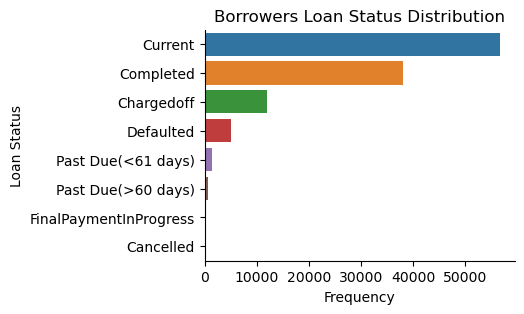

In [56]:
order = features_df.LoanStatus.value_counts()
desc_order = order.index.tolist()            # Arranges the LoanStatus categories in desc order

plt.figure(figsize=(4,3))
sns.countplot(data=features_df, y='LoanStatus', order=desc_order)
sns.despine()

plt.title('Borrowers Loan Status Distribution')
plt.ylabel('Loan Status')
plt.xlabel('Frequency');

 #### 56,576 borrowers are in current payment without defaulting. 38,074 have completed their payments. 5,018 borrowers have defaulted, 11,992 have had their loans charged-off, and a total of 2,067 borrowers are past due.

 ### Borrowers Income Range

In [26]:
features_df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

#### Countplot for Income Range

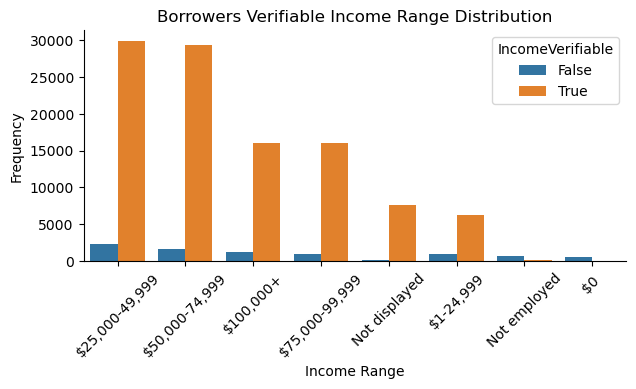

In [55]:
order = features_df.IncomeRange.value_counts()
desc_order = order.index.tolist()            # Arranges the IncomeRange categories in desc order

plt.figure(figsize=(7,3))
sns.countplot(data=features_df, x='IncomeRange', order=desc_order, hue='IncomeVerifiable')  #adds income verifiable Hue
sns.despine()

plt.xticks(rotation = 45)
plt.title('Borrowers Verifiable Income Range Distribution')
plt.xlabel('Income Range')
plt.ylabel('Frequency');

#### 32,192 borrowers were in the income range of 25,000-49,999 while 31,050 were in the income range  50,000-74,999. Unemployed and borrowers with no income constituted the smallest size of the population. Over 34,253 borrowers where in the income range of 75,000 and above.

### Borrowers Monthly Payment

#### Distplot for Monthly Payment

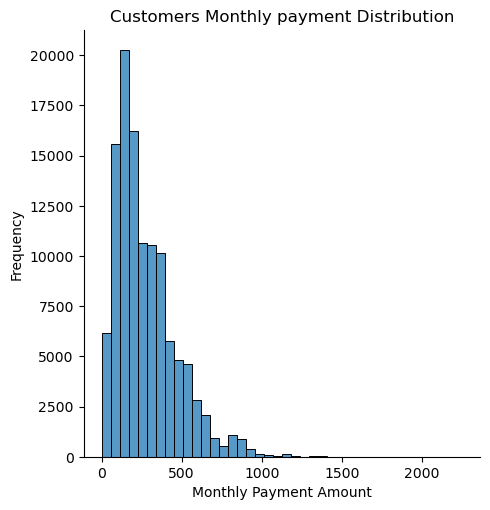

In [28]:
sns.displot(features_df['MonthlyLoanPayment'], kde=False, bins=40)

plt.title('Customers Monthly payment Distribution')
plt.ylabel('Frequency')
plt.xlabel('Monthly Payment Amount');

#### Most of the borrowers made monthly payments in the range of 0-500.

### Number of Loans per Year

#### Converting the Loan origination quater column into loan year column

In [29]:
features_df.LoanOriginationQuarter = features_df.LoanOriginationQuarter.str.split(' ', expand=True)[1]
features_df.columns = features_df.columns.str.replace('LoanOriginationQuarter','LoanYear')


In [40]:
features_df.LoanYear.value_counts()

2013    34345
2012    19553
2014    12172
Name: LoanYear, dtype: int64

#### Countplot for Loan Year

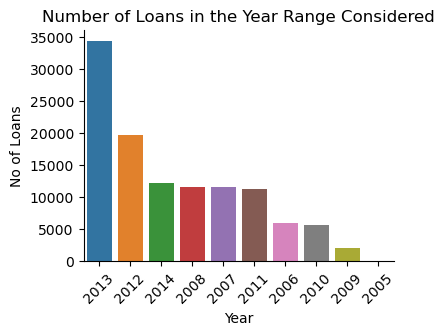

In [54]:
order = features_df.LoanYear.value_counts()
desc_order = order.index.tolist()            # Arranges the LoanYear categories in desc order

plt.figure(figsize=(4,3))
sns.countplot(data=features_df, x='LoanYear', order=desc_order) 
sns.despine()

plt.xticks(rotation = 45)
plt.title('Number of Loans in the Year Range Considered')
plt.xlabel('Year')
plt.ylabel('No of Loans');

#### It is fair to say that there has been an increasing trend in the popularity of prosper loan among borrowers. From a measly 22 number of loaners in 2005, the number of borrowers increased to 34,345 in 2013. There was a sharp drop-off in the number of borrowers in 2009, and this could be linked to the economic crisis of that year.  The number of borrowers increased again in 2010, and continued to grow till 2013. However, there was another drop-off in 2014.

### No of Loans by Borrowers State

In [41]:
features_df.BorrowerState.value_counts().head(10)

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
Name: BorrowerState, dtype: int64

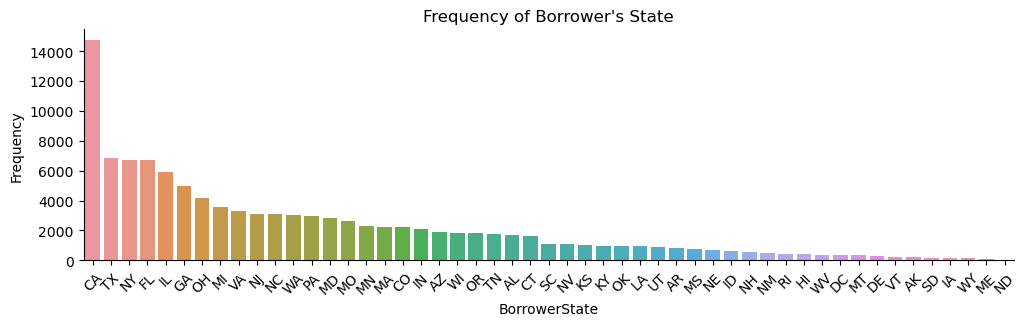

In [45]:
plt.subplots(figsize = [12,3])
order = features_df['BorrowerState'].value_counts().index
sns.countplot(data=features_df, x='BorrowerState', order= order)
sns.despine()

plt.xticks(rotation=45)
plt.xlabel('BorrowerState')
plt.ylabel('Frequency')
plt.title('Frequency of Borrower\'s State');

## Bivariate Exploration



### Average Monthly Payment by Borrowers Loan Status

####  Barplot for Avg Monthly Payment by Loan Status

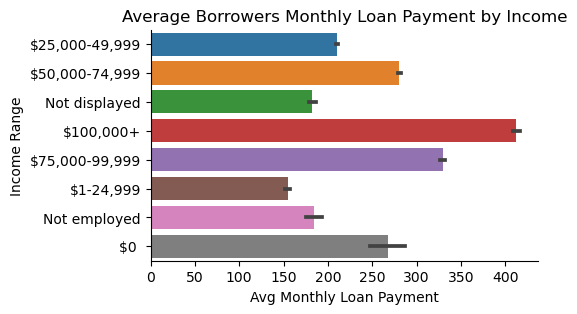

In [53]:
plt.figure(figsize=(5,3))
sns.barplot(y='IncomeRange', x='MonthlyLoanPayment',data=features_df)
sns.despine()

plt.title('Average Borrowers Monthly Loan Payment by Income')
plt.xlabel('Avg Monthly Loan Payment')
plt.ylabel('Income Range'); 

#### For the employed borrowers, we can see that their income range influenced how much they were able to pay monthly. Those in the 100,000+ range paid the highest amount monthly, while those in the 1-24,000 paid the least amount.

### Average Interest Rate by Borrowers Loan Status

#### Barplot for Avg Interest Rate by Loan Status

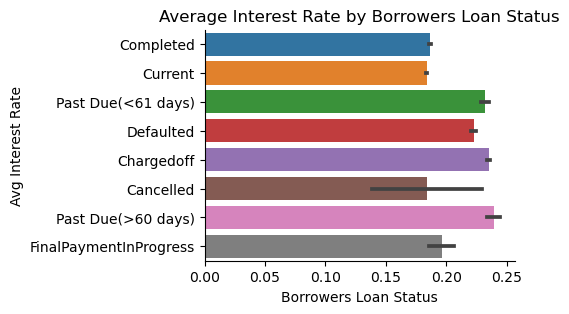

In [52]:
plt.figure(figsize=(4,3))
sns.barplot(y='LoanStatus', x='BorrowerRate',data=features_df)
sns.despine()


plt.title('Average Interest Rate by Borrowers Loan Status',)
plt.ylabel('Avg Interest Rate')
plt.xlabel('Borrowers Loan Status');

#### Unsurprisingly, interest rate affected the ability of borrowers to pay back their loans. On average, the interest rate of borrowers who had completed payment, actively paying, or has had their loans cancelled was less than the interest rate of borrowers who had defaulted, or were past due their payment dates.

### Average Initial Loan Amount by Borrowers Loan Status

#### Barplot for Avg Initial Loan Amount by Loan Status

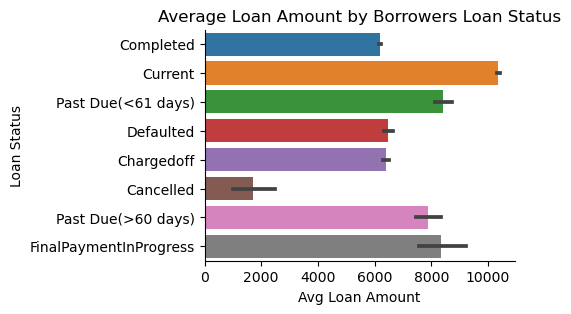

In [51]:
plt.figure(figsize=(4,3))
sns.barplot(y='LoanStatus', x='LoanOriginalAmount',data=features_df)
sns.despine()


plt.title('Average Loan Amount by Borrowers Loan Status')
plt.xlabel('Avg Loan Amount')
plt.ylabel('Loan Status');

#### Borrowers who were able to complete their payments or had their loan cancelled had the smallest initial loan amount. Those with cancelled loans borrowed the least amount which was definitely one of the criteria to have your loans cancelled.

 ### Customers Inquiries by Borrowers loan Status

#### Barplot for Customers Inquiries by Loan Status

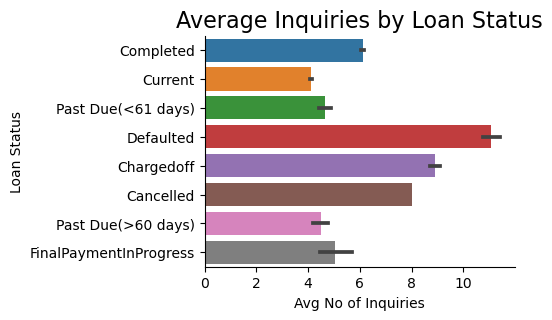

In [49]:
plt.figure(figsize=(4,3))
sns.barplot(y='LoanStatus', x='TotalInquiries',data=features_df)
sns.despine()

plt.title('Average Inquiries by Loan Status', fontsize=16)
plt.xlabel('Avg No of Inquiries')
plt.ylabel('Loan Status');

#### Borrowers who had defaulted in payment, had their loans chargedoff, cancelled, or had completed their payments had on average the highest number of enquiries, with defaulted borrowers having the highest number of enquiries. Borrowers who were current on their payment and most likely did not have much questions about their payments had the lowest number of enquiries.

### Average Amount Loaned

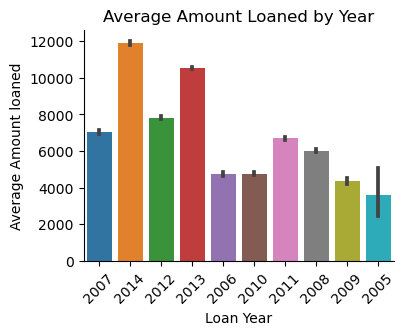

In [60]:
plt.figure(figsize=(4,3))
sns.barplot(x='LoanYear', y='LoanOriginalAmount',data=features_df)
sns.despine()

plt.xticks(rotation = 45)
plt.title('Average Amount Loaned by Year')
plt.ylabel('Average Amount loaned')
plt.xlabel('Loan Year');

#### Similar to the average number of loans per year, the average amount loaned also increased from 2005 to 2007, but then dropped in 2008 and 2009 which could be linked to the world financial crisis of those years. It however picked up in 2010 and continued to increase till 2014.

### Average Monthly Payment

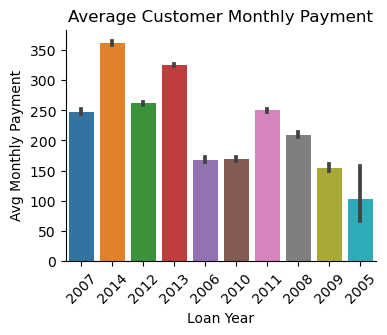

In [61]:
plt.figure(figsize=(4,3))
sns.barplot(x='LoanYear', y='MonthlyLoanPayment',data=features_df)
sns.despine()

plt.xticks(rotation = 45)
plt.title('Average Customer Monthly Payment')
plt.ylabel('Avg Monthly Payment')
plt.xlabel('Loan Year');

#### The average monthly payment in the year range considered has also followed the average amount loaned per year trend. The drop-off in 2008 and 2009 linked to the world economic crisis.

### Embedded Visualisation from Power BI

#### Avg Amount Deliquent, Avg Original Loan, Avg borrower Rate, Avg Stated Monthly Income by Borrower State.

In [62]:
# Embedding Borrower State Visuals from Power BI 
IFrame(src='https://app.powerbi.com/view?r=eyJrIjoiMDZlMWVlNzYtZjQwZS00MDU4LWIwZjYtY2M2MjQ0NGQ4YjEzIiwidCI6ImRmODY3OWNkLWE4MGUtNDVkOC05OWFjLWM4M2VkN2ZmOTVhMCJ9', height=636, width=800)

## Conclusions
>  1. The most common loan term was 36 months.
>  2. 2013 had the highest number of loans 34,345 loans.
>  3. Credit grade C was the most popular Credit grade amongst Prosperloan borrowers with 23,994 loans.
>  4. The top 4 states with the highest numbers of loans are Catifornia (14,717 loans), Texas (6,842 loans),
      New York (6,729 loans), Florida (6,720 loans)



